In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('F:\\STEMETA_Intership_Projects\\Heart_Failure_Prediction\\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

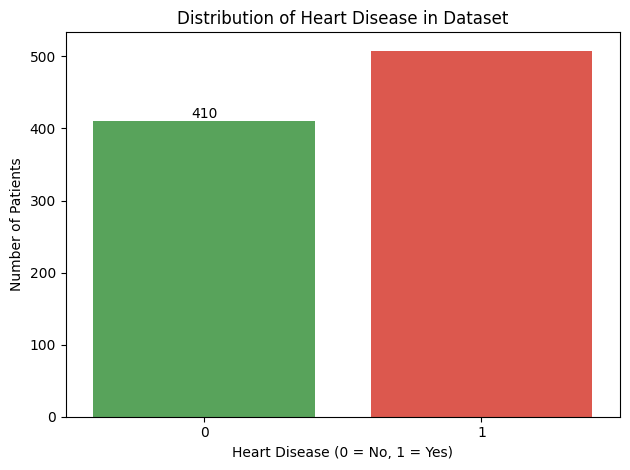

In [5]:
# Evaluating the target and finding out the potential skewness in the data
colors = ['#4CAF50', '#F44336']  # Green for no disease, Red for disease
ax = sns.countplot(x='HeartDisease', hue='HeartDisease', data=df, palette=colors, legend=False)
ax.bar_label(ax.containers[0])

plt.title("Distribution of Heart Disease in Dataset")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

In [6]:
print(df['HeartDisease'].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


In [7]:
# Label Encoding for binary features
from sklearn.preprocessing import LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # M=1, F=0
df['ExerciseAngina'] = LabelEncoder().fit_transform(df['ExerciseAngina'])
print(df.columns.tolist())

df.head()
# One-Hot Encoding for categorical columns with more than 2 categories
#df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [8]:
print(df['ChestPainType'].value_counts())

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64


In [9]:
# Convert all boolean (True/False) columns to 1/0
df = df.astype({col: 'int' for col in df.columns if df[col].dtype == 'bool'})
print(df.dtypes)


Age                 int64
Sex                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [10]:
# Handle categorical variables if any
df = pd.get_dummies(df, drop_first=True)

In [12]:
# Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
C_values = [0.01, 0.1, 1, 10, 100]
train_acc, test_acc = [], []

for C in C_values:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

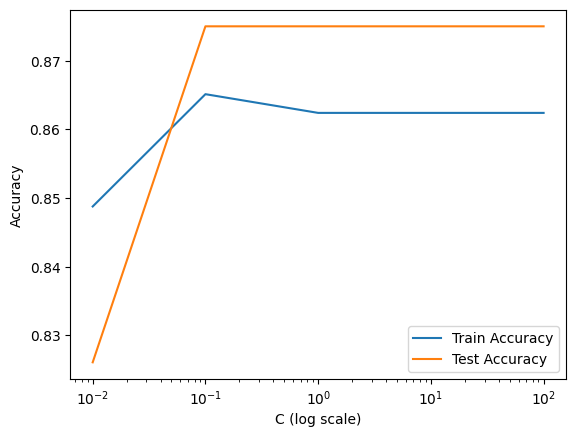

In [15]:
# Plot accuracy vs C values
plt.plot(C_values, train_acc, label="Train Accuracy")
plt.plot(C_values, test_acc, label="Test Accuracy")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

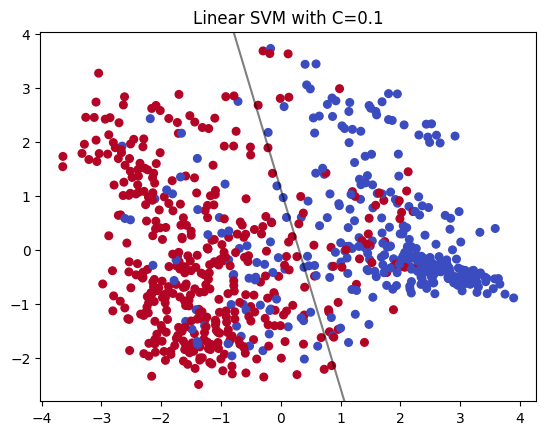

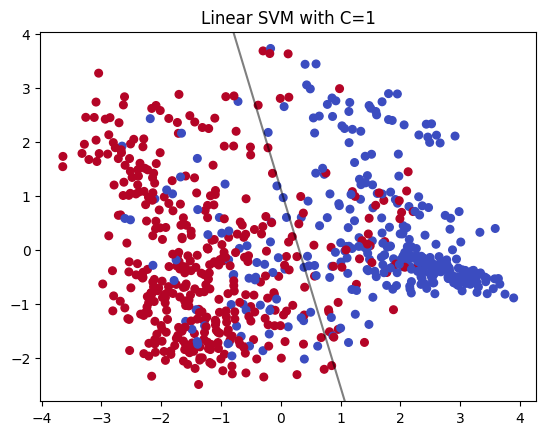

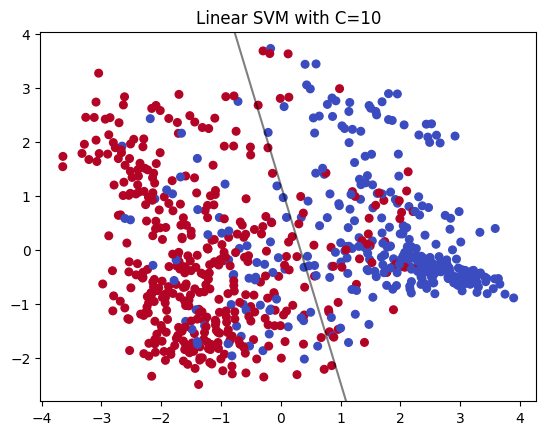

In [16]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

for C in [0.1, 1, 10]:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train_pca, y_train)
    
    # Plot decision boundary
    plt.figure()
    plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="coolwarm", s=30)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 100),
        np.linspace(ylim[0], ylim[1], 100)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
    
    plt.title(f"Linear SVM with C={C}")
    plt.show()


Train Polynomial SVM

In [17]:
degrees = [2, 3, 4, 5]
train_acc, test_acc = [], []

for d in degrees:
    model = SVC(kernel="poly", degree=d, C=1, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))




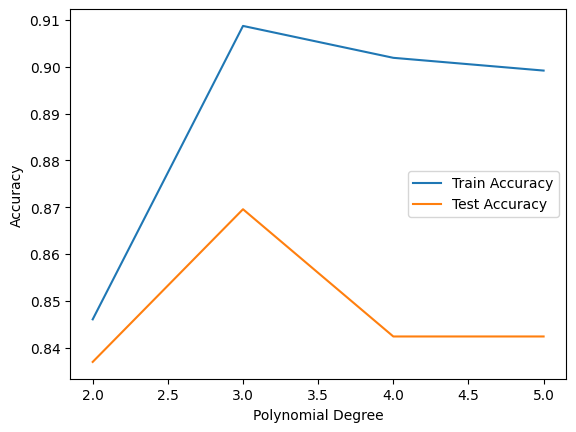

In [18]:
# Plot accuracy vs degree
plt.plot(degrees, train_acc, label="Train Accuracy")
plt.plot(degrees, test_acc, label="Test Accuracy")
plt.xlabel("Polynomial Degree")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Grid Search for Best Hyperparameters

In [19]:
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf"],
    "gamma": ["scale", "auto"],
    "degree": [2, 3]  
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.8623334265212934


Evaluate Best Model

In [20]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[69 13]
 [ 5 97]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.88      0.95      0.92       102

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



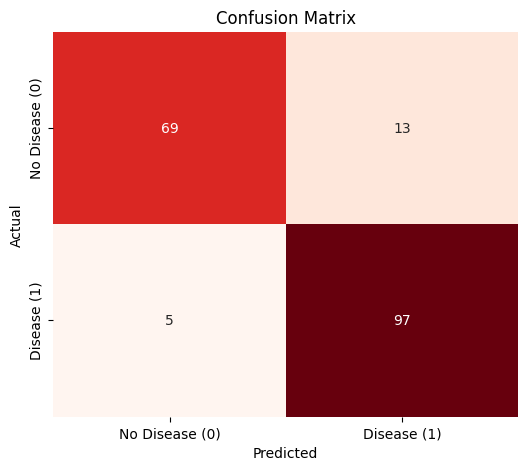

In [21]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=["No Disease (0)", "Disease (1)"],
            yticklabels=["No Disease (0)", "Disease (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Compare Different Kernels

In [22]:
kernels = ["linear", "poly", "rbf"]
results = []

for k in kernels:
    model = SVC(kernel=k, C=1, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    results.append({"Kernel": k, "Accuracy": acc})

results_df = pd.DataFrame(results)
print(results_df)



   Kernel  Accuracy
0  linear  0.875000
1    poly  0.869565
2     rbf  0.902174


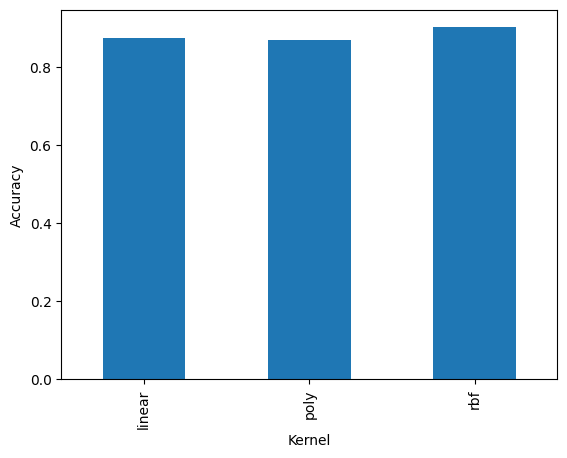

In [23]:
# Bar chart
results_df.plot(x="Kernel", y="Accuracy", kind="bar", legend=False)
plt.ylabel("Accuracy")
plt.show()
